# FIT1043 Introduction to Data Science Assignment 2
Ian WONG
<br>
**Student ID:** 30612616
---
# Question 1
## 1. Introduction

### a. Introduction

In Question 1, we will be looking at a dataset containing information about borrowers that have taken a loan from an investor. Using this dataset, we are trying to create a model to predict whether or not a borrower will pay back their loan in full, based on numerous characteristics of the borrower and the loan.

### b. Importing Libraries + Reading Data

The first library we will be importing is **pandas**, which is used to create *DataFrames*. These dataframes allow us to manage and manipulate data more easily.

The second library we will be importing is **matplotlib.pyplot**, which is used to plot and visualise data in Python.

We will also be importing **numpy**, which is a package that is used for working with arrays.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using the `read_csv` command from **pandas**, we are reading the dataset from `load_data.csv`:

In [4]:
loan_data = pd.read_csv('Assignment 2Data/loan_data.csv')

To make sure we are reading the data in correctly, we are going to use `head()`, `tail()`, and `sample()` to check the data:

In [6]:
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
loan_data.tail()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [8]:
loan_data.sample(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6557,1,0.1183,728.95,12.254863,13.51,757,3814.041667,298,1.0,1,0,0,0
49,1,0.0743,178.69,11.736069,0.27,792,7488.958333,2817,10.2,0,0,0,0
4398,1,0.0740,186.36,11.608236,12.86,787,9484.000000,63621,13.2,0,0,0,0
4082,1,0.1600,527.36,11.156251,7.83,662,6329.958333,18503,86.5,0,0,0,0
332,1,0.1109,327.82,10.633449,19.32,702,2849.000000,15368,87.1,0,0,0,0


In [6]:
loan_data.mean()

credit.policy            0.804970
int.rate                 0.122640
installment            319.089413
log.annual.inc          10.932117
dti                     12.606679
fico                   710.846314
days.with.cr.line     4560.767197
revol.bal            16913.963876
revol.util              46.799236
inq.last.6mths           1.577469
delinq.2yrs              0.163708
pub.rec                  0.062122
not.fully.paid           0.160054
dtype: float64



### c. Histogram

In this task, we are asked to create a stacked histogram for `not.fully.paid` against borrowers' credit scores `fico`.

Using `.groupby()` and `.agg()`, we are grouping the dataframe by `fico` and finding:
- the total number of loans; `count`
- the total number of fully paid loans; `sum`

In [9]:
groupbyFico = loan_data.groupby('fico')['not.fully.paid'].agg(['count','sum'])

Using the resulting columns, we can calculate the number of loans not fully paid and fully paid:
- `Not Fully Paid = sum`
- `Fully Paid = count - sum`

In [10]:
groupbyFico['Not Fully Paid'] = groupbyFico['sum']
groupbyFico['Fully Paid'] = groupbyFico['count'] - groupbyFico['sum'] 

Using `.loc`, we select the newly created `Not Fully Paid` and `Fully Paid` columns and use `.reset_index()` and `rename()` to clean up the data.

In [11]:
groupbyFico = groupbyFico.loc[:, ('Not Fully Paid', 'Fully Paid')]
groupbyFico = groupbyFico.reset_index()
groupbyFico.rename(
    columns = {'fico' : 'Fico'},
    inplace = True
)
groupbyFico.head()

,Fico,Not Fully Paid,Fully Paid
0,612,0,2
1,617,1,0
2,622,0,1
3,627,1,1
4,632,4,2


Using `plt.bar`, we are creating a stacked histogram with `fico` as the x axis and number of loans as the y axis. 

We are doing this as a proportion of loans, as we wish to see whether `fico` score affects how likely a loan is to be paid off.

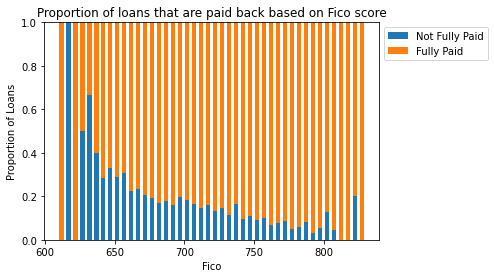

In [12]:
percent = groupbyFico['Not Fully Paid']/(groupbyFico['Not Fully Paid'] + groupbyFico['Fully Paid'])

barWidth = 3

plt.bar(groupbyFico['Fico'], percent, width = barWidth, label = 'Not Fully Paid')
plt.bar(groupbyFico['Fico'], 1 - percent, bottom = percent, width = barWidth, label = 'Fully Paid')

plt.xlabel('Fico')
plt.ylabel('Proportion of Loans')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Proportion of loans that are paid back based on Fico score')

plt.show()

By observing the graph above, we can see that the proportion of fully paid loans increases as credit score, `fico`, increases. 

This indicates that a borrower with a *higher* credit score is **more likely** to fully pay back a loan compared to a borrower with a *lower* credit score. 

### d.  Fico and Interest Rate Plot

In this task, we are asked to create a plot to show the relationship between `fico` and `int.rate`. 

We will be using a scatter plot to represent the data points and be using **LinearRegression** from the package `sklearn.linear_model` to obtain a line of best fit to better represent the trend of the data. 

First, we will be importing **LinearRegression** from `sklearn.linear_model`:

In [13]:
from sklearn.linear_model import LinearRegression

Using `np.array()`, we fit `fico` and `int.rate` into a numpy array as x and y variables respectively.

In [14]:
x = np.array(loan_data['fico'])
x = x[:, np.newaxis]
y = np.array(loan_data['int.rate'])
y = y[:, np.newaxis]

Usinng `plt.scatter()`, we create a scatter plot for `fico` and `int.rate` and fit a line of best fit using `model.fit()`.

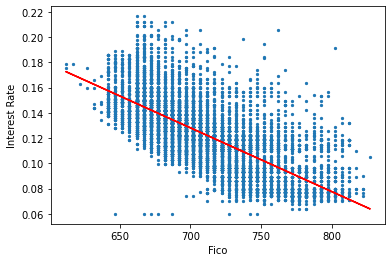

In [15]:
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y, s=5)
plt.plot(x, y_pred, color='r')
plt.xlabel('Fico')
plt.ylabel('Interest Rate')
plt.show()

By observing the scatter plot above and the predicted line of best fit, we can see there is a downward trend in the data, with interest rate decreasing as credit score increases.

This indicates that borrowers with *higher* credit scores are considered to be **less risky** and are therefore assigned *lower* interest rates.

## 2. Supervised Learning

### a. Supervised ML, Labelled Data, and Training/Testing Datasets

**Supervised Machine Learning:** Supervised ML is when we are trying to teach a machine to predict/infer an output by feeding it labelled data and having it attempt to "*approximate the mapping function so well that when you have new input data, you can predict the output variable for that data*". (Taken from Week 5 Lecture)

**Labelled Data:** Labelled data is data that has an associated label, such as an ID, cateogorical type, or a number attached to it. It is through these labels in Supervised ML that a machine can draw patterns from the data and try to make inferences.

**Training and Testing Datasets:** Data is split into training and testing datasets. The Training Dataset is used to help the machine develop a predictive model by feeding it inputs and their corresponding outputs. The Testing Dataset is used to test how well the algorithm the machine created works, and helps to adjust it based on the results.

### b. Labels and Features

The **label** in this dataset is `not.fully.paid`, as we are trying to identify how the features affect how likely a loan will be fully paid off.

Some **features** in this dataset include:
- `fico`; the credit score of the borrower
- `dti`; debt to income ratio
- `revol.bal`; the borrower's revolving balance
- `revol.util`; the borrower's utilisation rate
- `delinq.2yrs`; number of times the borrower had been past due a payment
- `pub.rec`; number of derogatory public records

These features are likely to tell the lender if the borrower is trustworthy or not.

### c. Splitting the data

In this task, we are going to split our data into a training dataset containing 80% of `loan_data` and a testing dataset containing the remaining 20%. 

We start off by using `.columns` to take a look at our dataset's columns: 

In [16]:
loan_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Then, using `.iloc` we are going to select the appropriate columns for the input data **x** and output data **y**:

In [17]:
X = loan_data.iloc[:, 0:11].values # input data
X

array([[1.0000e+00, 1.1890e-01, 8.2910e+02, ..., 5.2100e+01, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0710e-01, 2.2822e+02, ..., 7.6700e+01, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3570e-01, 3.6686e+02, ..., 2.5600e+01, 1.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0710e-01, 9.7810e+01, ..., 8.2900e+01, 8.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.6000e-01, 3.5158e+02, ..., 3.2000e+00, 5.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.3920e-01, 8.5343e+02, ..., 5.7000e+01, 6.0000e+00,
        0.0000e+00]])

In [18]:
y = loan_data.iloc[:, 12].values # output data
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

We are using `sklearn.model_selection.train_test_split` to split the data, using `test_size = 0.2`:

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=0
)

## 3. Classification

### a. Binary and Multi-class Classification

In machine learning, Classification is the method of classifying data into different groups. 

**Binary classification** is the categorisation of data into two distinct separate classes.

**Multi-class Classfication** is the categorisation of data into multiple different categories.

In this question, we are separating the data into two distinct categories of `not.fully.paid`: **0** or **1**. Therefore, our problem fits under the description of **Binary Classification**.

### b. Training 

Using `DecisionTreeClassifier` and `RandomForestClassifier` from `sklearn.tree`, we are going to train a **decision tree** and **random forest model**.

First, we need to normalise the data, using `StandardScaler()`. As the range of data can vary greatly, we scale the features down so they are proportionally similar:

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Decision Tree

Using `DecisionTreeClassifier`, we are going to fit a Decision Tree Classification to the training dataset:

In [21]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Random Forest

Using `RandomForestClassifier`, we are going to fit a Random Forest Classification to the training dataset:

In [22]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(
    n_estimators = 2000,
    criterion = 'entropy',
    random_state = 0
)
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=0)

### c. Prediction

#### i. Predict results

#### Decision Tree

Using `.predict`, we are predicting the test dataset for a Decision Tree Classification:

In [23]:
# Predicting the Test set results for Decision Tree Classification:
y_pred_dt = classifier.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Random Forest

Using `.predict`, we are predicting the test dataset for a Random Forest Classification:

In [24]:
# Predicting the Test set results for Random Forest Classification:
y_pred_rf = rfclassifier.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### ii. Display the confusion matrix

Using `.confusion_matrix` from the `sklearn.metrics` package, we are creating a confusion matrix for both classifications.

In [25]:
from sklearn.metrics import confusion_matrix

#### Decision Tree Confusion Matrix:

In [26]:
# Making the Confusion Matrix for Decision Tree Classification
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[1379,  236],
       [ 226,   75]], dtype=int64)

#### Random Forest Confusion Matrix:

In [27]:
# Making the Confusion Matrix for Random Forest Classification
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1609,    6],
       [ 296,    5]], dtype=int64)

## 4. Conclusion
Based on the confusion matrices from 3.c.ii, we can see that the **accuracy** of Random Forest Classification is far greater than Decision Tree Classification in this problem, with RF Classification having an accuracy of **84%** `(1609 + 5 / 1609 + 6 + 296 + 5)` versus DT Classification's accuracy of **76%** `(1379 + 75 / 1379 + 236 + 226 + 75)`.

Another metric that is of interest is **sensitivity**. That is, when the actual value is positive (a loan will not be fully paid back), how often is the prediction correct? In this case, DT Classification has a lower sensitivity when compared to RF, with DT having a precision of **85.4%** versus RF's sensitivity of **99.6%**.

In this problem, false positives (a loan that is predicted to be not be fully paid is paid in full) are more acceptable that false negatives (a loan that is predicted to be paid in full is not fully paid). Therefore, we should be optimising for sensitivity.

**RF Classification is performing better than DT Classification** in my opinion because of it's higher accuracy and sensitivity in this problem.

# Question 2.
## 1. Introduction
### a. Introduction
In this question, we are acting as a data scientist in an E-Commerce company. The company has two ways that they sell clothing online:

- through their **website**
- through their **mobile app**

The company also offers style/clothing advice sessions indoors. Customers attend these sessions and then they order their clothes on either the website or mobile app.

The company is asking you to determine whether they should focus their efforts on the mobile app or the website.

### b. Importing Libraries + Reading Data

The first library we will be importing is **pandas**, which is used to create *DataFrames*. These dataframes allow us to manage and manipulate data more easily.

The second library we will be importing is **matplotlib.pyplot**, which is used to plot and visualise data in Python.

We will also be importing **numpy**, which is a package that is used for working with arrays.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using `.read_csv()`, we are going to read in the dataset `customers-shop.csv`:

In [29]:
shop_data = pd.read_csv('Assignment 2Data/customers-shop.csv')

To make sure we are reading the data in correctly, we are going to use `head()`, `tail()`, and `sample()` to check the data:

In [30]:
shop_data.head()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [31]:
shop_data.tail()

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [32]:
shop_data.sample(5)

,Customer info-color Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
389,LightCyan,34.195508,12.664193,37.027150,4.330407,581.308933
403,OliveDrab,33.085298,13.093537,38.315648,4.750360,632.123588
152,CornflowerBlue,32.510218,10.984836,37.396497,5.391275,555.892595
28,LemonChiffon,33.110205,11.982045,35.293088,3.923489,529.537665
259,CadetBlue,32.096109,10.804891,37.372762,2.699562,375.398455


### c. Website Scatterplot

In this task, we are asked to create a scatter plot between **Time on Website** and **Yearly Amount Spent** and report on their correlation.

In order to do this, we are going to import `scipy.stats.linregress()` in order to get the correlation value and other values:

In [33]:
from scipy.stats import linregress

We are going to select the appropriate columns, with **Time on Website** as our x variable and **Yearly Amount Spent** as our y variable:

In [34]:
x = shop_data['Time on Website']
y = shop_data['Yearly Amount Spent']

Next, we are using `.scatter` for a scatter plot and `.figure` to increase the figure size so that we can see the data more clearly.

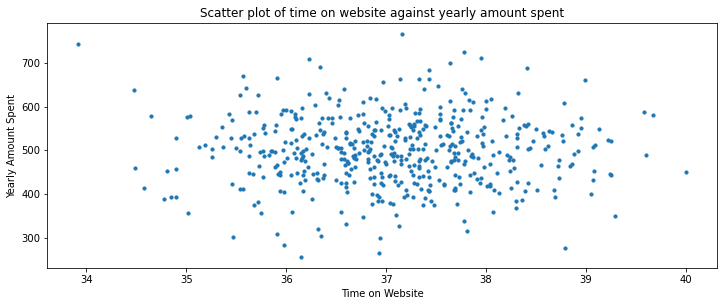

In [35]:
plt.figure(figsize=[12,4.5])
plt.scatter(x, y, s=10)
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.title('Scatter plot of time on website against yearly amount spent')
plt.show()

Taking a look at the scatter plot above, we can see that there is no evident correlation between time on website and yearly amount spent, with the data points being spread everywhere.

Using `linregress()`, we return 5 values:

- the **slope**,
- the **intercept**,
- the **r-value**,
- the **p-value**,
- and the **standard error**

We are only interested in the r-value for now, which is the correlation value:

In [36]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
r_value

-0.00264084471796325

As we can see by the **r_value = -0.003**, there is a very slight negative correlation between time spent on the website and the yearly amount spent. However, it is very close to 0, that it is almost negligible.

### d. App Scatter Plot

In this task, we are asked to create a scatter plot between **Time on App** and **Yearly Amount Spent** and report on their correlation.

First, we are going to select the appropriate columns, with **Time on App** as our x variable and **Yearly Amount Spent** as our y variable:

In [37]:
x = shop_data['Time on App']
y = shop_data['Yearly Amount Spent']

Next, we are using `.scatter` to create a scatter plot of the data:

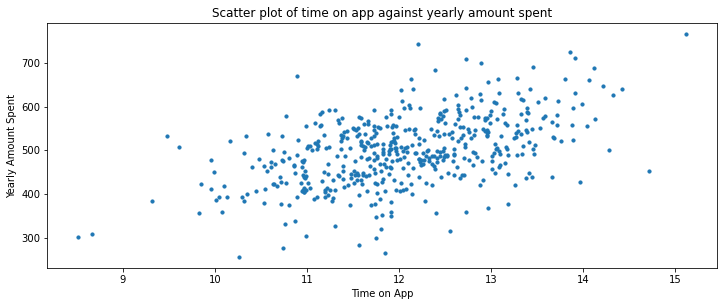

In [38]:
plt.figure(figsize=[12,4.5])
plt.scatter(x, y, s=10)
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.title('Scatter plot of time on app against yearly amount spent')
plt.show()

As we can see from the graph above, there appears to be a positive correlation between **Time on App** and **Yearly Amount Spent**. Therefore, as the customer spends more time on the app, they are likely to spend more on a yearly basis.

Using `linregress()`, we are obtaining the correlation value **r_value**:

In [39]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
r_value

0.49932777005983486

As we can see, the correlation value between **Time on App** and **Yearly Amount Spent** is about **0.5**. As the correlation value lies between -1 and 1, this is a relatively large positive correlation. Therefore, as the customer spends more time on the mobile, they are expected

Comparing this correlation with part c., it appears that the amount of time a customer spends on the mobile app affects the amount they spend yearly more compared to the time they spend on the website.

## 2. Supervised Learning

### a. Separation of Features and Label
The **label** in this dataset is `Yearly Amount Spent`, as we are trying to identify how the features affect the amount a customer spends yearly.

The **features** in this dataset are:

- `Time on App`; the amount of time the customer has spent on the mobile app
- `Time on Website`; the amount of time the customer has spent on the website


### b. Splitting the data

In this task, we are going to split our data into a training dataset containing 70% of `loan_data` and a testing dataset containing the remaining 30%. 

We start off by using `.columns` to take a look at our dataset's columns: 

In [40]:
shop_data.columns

Index(['Customer info-color Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Using `.iloc`, we are selecting the appropriate columns for the x and y variables:

In [41]:
X = shop_data.iloc[:, [2, 3]].values
X

array([[12.65565115, 39.57766802],
       [11.10946073, 37.26895887],
       [11.33027806, 37.11059744],
       [13.71751367, 36.72128268],
       [12.79518855, 37.5366533 ],
       [12.02692534, 34.47687763],
       [11.36634831, 36.68377615],
       [12.35195897, 37.37335886],
       [13.38623528, 37.53449734],
       [11.81412829, 37.14516822],
       [13.33897545, 37.22580613],
       [11.584783  , 37.08792607],
       [10.9612984 , 37.42021558],
       [12.95922609, 36.1446667 ],
       [13.14872569, 36.61995708],
       [12.63660605, 36.21376309],
       [11.73386169, 34.89409275],
       [12.01319469, 38.38513659],
       [14.71538754, 38.24411459],
       [13.98959256, 37.1905038 ],
       [11.36549203, 37.60779252],
       [12.8779837 , 37.44102134],
       [13.37856278, 38.73400629],
       [11.65757592, 36.77260376],
       [12.8936695 , 37.63575588],
       [11.76581265, 37.73852495],
       [12.78389178, 36.43064962],
       [13.00781942, 37.85177917],
       [11.98204499,

In [42]:
y = shop_data.iloc[:, 5].values
y

array([587.951054 , 392.2049334, 487.5475049, 581.852344 , 599.406092 ,
       637.1024479, 521.5721748, 549.9041461, 570.200409 , 427.1993849,
       492.6060127, 522.3374046, 408.6403511, 573.4158673, 470.4527333,
       461.7807422, 457.8476959, 407.7045475, 452.3156755, 605.0610388,
       534.7057438, 419.9387748, 436.5156057, 519.3409891, 700.9170916,
       423.1799917, 619.8956399, 486.8389348, 529.5376653, 554.7220838,
       497.5866713, 447.6879065, 588.7126055, 491.0732237, 507.4418323,
       521.8835732, 347.7769266, 490.7386321, 478.1703341, 537.8461953,
       532.7517876, 501.8744303, 591.1971782, 547.2443434, 448.2298292,
       549.8605905, 593.915003 , 563.6728734, 479.7319491, 416.3583536,
       725.5848141, 442.6672517, 384.6265716, 451.4574469, 522.4041413,
       483.673308 , 520.8987945, 453.1695024, 496.6507081, 547.3651406,
       616.851523 , 507.212569 , 613.5993234, 483.1597208, 540.2634004,
       765.5184619, 553.6015347, 469.3108615, 408.6201878, 451.5

We are using `sklearn.model_selection.train_test_split` to split the data, using `test_size = 0.3`:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0
)

After that, we are splitting the training and testing datasets into different arrays for testing **Time on App** and **Time on Website**:

In [44]:
X_train_app = X_train[:, np.newaxis, 0]
X_test_app = X_test[:, np.newaxis, 0]

X_train_web = X_train[:, np.newaxis, 1]
X_test_web = X_test[:, np.newaxis, 1]

## 3. Regression

### a. Training a Linear Regression Model

In this task, we are asked to train a linear regression model and report the coefficients of the regression model. Therefore, we are training two seperate linear regressions and comparing them.

#### App Linear Regression Model

Using `LinearRegression`, we are fitting a model to the training data for **Time on App**:

In [45]:
from sklearn.linear_model import LinearRegression
model_app = LinearRegression()
model_app.fit(X_train_app, y_train)

LinearRegression()

We are going to use `.coef_` to report the coefficients, and `.intercept_` to report the intercept:

In [46]:
print('Intercept: \n', model_app.intercept_)
print('Coefficients: \n', model_app.coef_)

Intercept: 
 29.061584912835713
Coefficients: 
 [39.1629381]


#### Website Linear Regression Model

We are using `LinearRegression` again to fit a model to the training data for **Time on Website**:

In [47]:
model_web = LinearRegression()
model_web.fit(X_train_web, y_train)

LinearRegression()

Using `.intercept_` and `.coef_`, we are able to report the Intercept and Coefficient of the regression model:

In [48]:
print('Intercept: \n', model_web.intercept_)
print('Coefficients: \n', model_web.coef_)

Intercept: 
 560.3625431733054
Coefficients: 
 [-1.58457927]


#### Comparison

Comparing the intercept and coefficients between the regression models of **Time on App** and **Time on Website**, we can see that:

- The intercept of App is **29.06** against the intercept of Web which is **560.36**.  
Therefore, the App Regression Model predicts that a customer will spend around **$29 yearly when they have spent 0 mins on the mobile app** whilst the Web Regression Model predicts that a customer will spend around **$560 yearly when they have spent 0 mins on the website**.
- The coefficient of App is **39.16** against the coefficient of Web which is **-1.58**.  
Therefore, the App Regression Model predicts that **every minute the customer spends on the mobile app will increase the amount they spend yearly by around $39** whilst the Web Regression Model predicts that **every minute will decrease yearly amount spent by $1.58**.

### b.i. Prediction
#### App Regression Model

Using `.predict()`, we are going to predict the results for the testing dataset for **Time on App**:


In [49]:
y_pred_app = model_app.predict(X_test_app)

Using `.scatter()` and `.plot`, we are creating a scatter plot of the testing data and plotting the predicted values from the regression model:

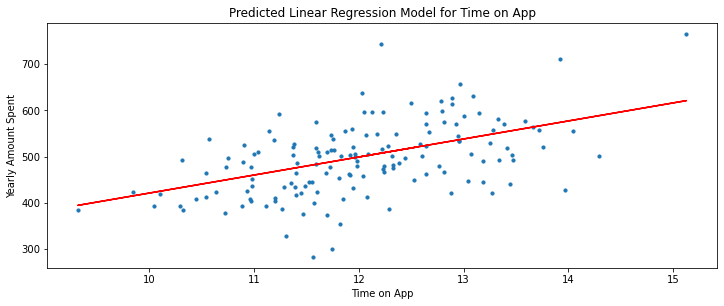

In [50]:
plt.figure(figsize=[12,4.5])
plt.scatter(X_test_app, y_test, s=10)
plt.plot(X_test_app, y_pred_app, color = 'r')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.title('Predicted Linear Regression Model for Time on App')
plt.show()

#### Web Regression Model

Using `.predict()`, we are going to predict the results for the testing dataset for **Time on Website**:

In [51]:
y_pred_web = model_web.predict(X_test_web)

Using `.scatter()` and `.plot`, we are creating a scatter plot of the testing data and plotting the predicted values from the regression model:

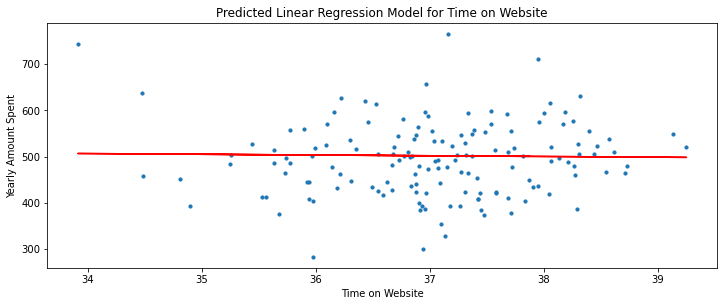

In [52]:
plt.figure(figsize=[12,4.5])
plt.scatter(X_test_web, y_test, s=10)
plt.plot(X_test_web, y_pred_web, color = 'r')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.title('Predicted Linear Regression Model for Time on Website')
plt.show()

### b.ii. Accuracy Metrics

Using `mean_squared_error` and `mean_absolute_error` from the `sklearn.metrics` package, we are going to report the MSE and MAE for both linear regression models.

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### App Linear Regression Model

In [55]:
mse_app = mean_squared_error(X_test_app, y_pred_app)
mae_app = mean_absolute_error(X_test_app, y_pred_app)
print('Mean Squared Error: \n', mse_app)
print('Mean Absolute Error: \n', mae_app)

Mean Squared Error: 
 239359.95304028937
Mean Absolute Error: 
 487.78085314255907


#### Web Linear Regression Model

In [56]:
mse_web = mean_squared_error(X_test_web, y_pred_web)
mae_web = mean_absolute_error(X_test_web, y_pred_web)
print('Mean Squared Error: \n', mse_web)
print('Mean Absolute Error: \n', mae_web)

Mean Squared Error: 
 215908.44404061852
Mean Absolute Error: 
 464.6528302674726


## 4. Conclusion

Based on the metrics obtained in 3.b.ii., the Web Linear Regression Model has a lower **mean squared error** and **mean absolute error** than the App Linear Regression Model.

The MSE and MAE are used to judge the accuracy of the regression model, with MSE taking the average of the squared errors between the predicted value and actual values whilst MAE averages the weighted differences equally.  
**The lower the value of MSE and MAE, the better the model's performance.**

As the Web Linear Regression Model more accurately predicts the actual values of **Yearly Amount Spent**, the company should focus their efforts on their website.